In [90]:
import numpy as np

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
import seaborn as sns
%matplotlib inline

In [50]:
train=pd.read_csv('titanic_train.csv')

In [51]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [52]:
answer=train['Survived']

In [53]:
train.drop(['Survived'],axis=1,inplace=True)

In [54]:
answer.head()


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [55]:
test=pd.read_csv('titanic_test.csv')


In [56]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
all=train.append(test)

In [59]:
all.drop(['PassengerId'],axis=1,inplace=True)

In [60]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


In [61]:
def get_titles():

    global all
    
    # we extract the title from each name
    all['Title'] = all['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    
    # we map each title
    all['Title'] = all.Title.map(Title_Dictionary)

In [62]:
get_titles()

In [63]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 122.7+ KB


In [64]:
grouped_train = all.head(891).groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()

grouped_test = all.iloc[891:].groupby(['Sex','Pclass','Title'])
grouped_median_test = grouped_test.median()

In [65]:
def process_age():
    
    global all
    
    # a function that fills the missing values of the Age variable
    
    def fillAges(row, grouped_median):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 1, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 1, 'Mrs']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['female', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['female', 1, 'Royalty']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 2, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 2, 'Mrs']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 3, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 3, 'Mrs']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 1, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 1, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['male', 1, 'Royalty']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 2, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 2, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 2, 'Officer']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 3, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 3, 'Mr']['Age']
    
    all.head(891).Age = all.head(891).apply(lambda r : fillAges(r, grouped_median_train) if np.isnan(r['Age']) 
                                                      else r['Age'], axis=1)
    
    all.iloc[891:].Age = all.iloc[891:].apply(lambda r : fillAges(r, grouped_median_test) if np.isnan(r['Age']) 
                                                      else r['Age'], axis=1)


In [66]:
process_age()

C:\Users\Ravi Raj\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [67]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1309 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 122.7+ KB


In [68]:
all['Embarked'].fillna('S',inplace=True)

In [69]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1309 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 122.7+ KB


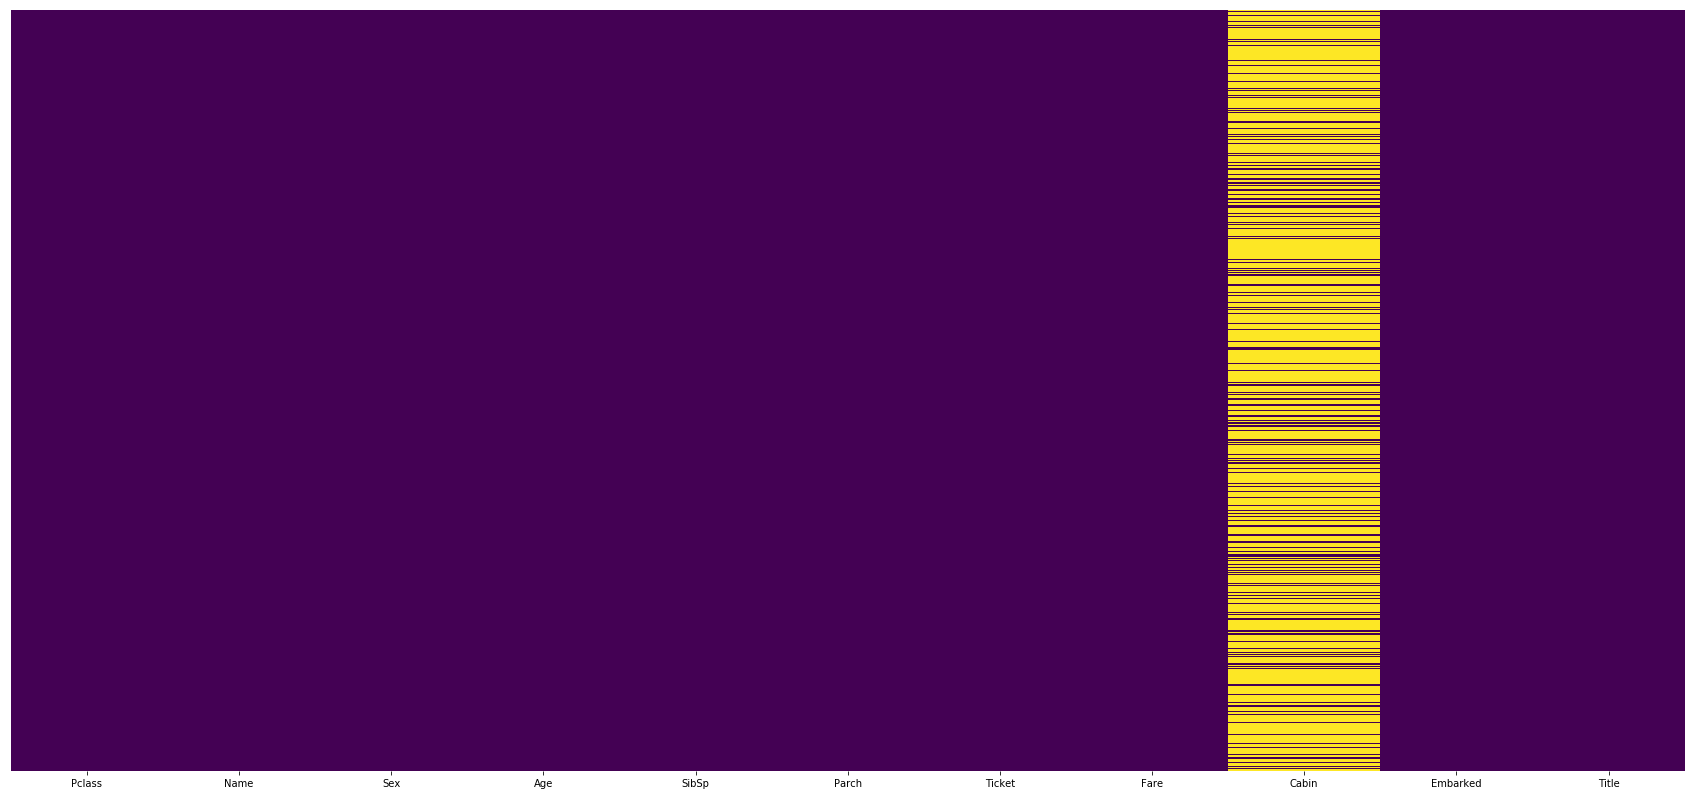

In [70]:
plt.figure(figsize=(30,14))
sns.heatmap(all.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [71]:
sex = pd.get_dummies(all['Sex'],drop_first=True)
embark = pd.get_dummies(all['Embarked'],drop_first=True)
title=pd.get_dummies(all['Title'],drop_first=True)
all = pd.concat([all,sex,embark,title],axis=1)


In [72]:
all.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,male,Q,S,Miss,Mr,Mrs,Officer,Royalty
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,0,1,0,1,0,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,0,0,0,0,1,0,0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,0,1,1,0,0,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,0,0,1,0,0,1,0,0
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,0,1,0,1,0,0,0


In [73]:
all.drop(['Sex','Embarked','Title'],axis=1,inplace=True)

In [74]:
all.drop(['Name'],axis=1,inplace=True)

In [75]:
def process_fares():
    
    global combined
    # there's one missing fare value - replacing it with the mean.
    all.head(891).Fare.fillna(all.head(891).Fare.mean(), inplace=True)
    all.iloc[891:].Fare.fillna(all.iloc[891:].Fare.mean(), inplace=True)
    
  
process_fares()

C:\Users\Ravi Raj\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [76]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
Pclass     1309 non-null int64
Age        1309 non-null float64
SibSp      1309 non-null int64
Parch      1309 non-null int64
Ticket     1309 non-null object
Fare       1309 non-null float64
Cabin      295 non-null object
male       1309 non-null uint8
Q          1309 non-null uint8
S          1309 non-null uint8
Miss       1309 non-null uint8
Mr         1309 non-null uint8
Mrs        1309 non-null uint8
Officer    1309 non-null uint8
Royalty    1309 non-null uint8
dtypes: float64(2), int64(3), object(2), uint8(8)
memory usage: 92.0+ KB


In [77]:
def process_cabin():
    
    global all
    
    # replacing missing cabins with U (for Uknown)
    combined.Cabin.fillna('U', inplace=True)
    
    # mapping each Cabin value with the cabin letter
    combined['Cabin'] = combined['Cabin'].map(lambda c : c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')
    
    combined = pd.concat([combined,cabin_dummies], axis=1)
    
    combined.drop('Cabin', axis=1, inplace=True)
    
    status('cabin')

In [78]:
all.Cabin.fillna('U',inplace=True)

In [79]:
all['Cabin']=all['Cabin'].map(lambda c: c[0])

In [80]:
cabin = pd.get_dummies(all['Cabin'],drop_first=True)

all = pd.concat([all,cabin],axis=1)


In [81]:
all.drop(['Cabin'],inplace=True)

In [82]:
all['Family_size']=all['SibSp']+all['Parch']+1

In [83]:
all['single']=all['Family_size'].map(lambda a: 1 if a==1 else 0 )
all['small_family']=all['Family_size'].map(lambda a: 1 if 1<a<=4 else 0 )
all['large_family']=all['Family_size'].map(lambda a: 1 if a>4 else 0 )

In [97]:
all.drop(['Cabin'],axis=1,inplace=True)

ValueError: labels ['Cabin'] not contained in axis

In [98]:
def process_ticket():
    
    global all
    
    # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
    def cleanTicket(tic):
        tic = tic.replace('.','')
        tic = tic.replace('/','')
        tic = tic.split()
        tic = map(lambda t : t.strip(), tic)
        tic = filter(lambda t : not t.isdigit(), tic)
    
        if len(tic) > 0:
            return lt[0]
        else: 
            return 'XXX'
    

    # Extracting dummy variables from tickets:

    all['Ticket'] = all['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(all['Ticket'], prefix='Ticket')
    all = pd.concat([all, tickets_dummies], axis=1)
    all.drop('Ticket', inplace=True, axis=1)

    status('ticket')
process_ticket()

AttributeError: 'filter' object has no attribute 'replace'

In [86]:
all

,Pclass,Age,SibSp,Parch,Ticket,Fare,male,Q,S,Miss,...,D,E,F,G,T,U,Family_size,single,small_family,large_family
0,3,22.0,1,0,A/5 21171,7.2500,1,0,1,0,...,0,0,0,0,0,1,2,0,1,0
1,1,38.0,1,0,PC 17599,71.2833,0,0,0,0,...,0,0,0,0,0,0,2,0,1,0
2,3,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1,...,0,0,0,0,0,1,1,1,0,0
3,1,35.0,1,0,113803,53.1000,0,0,1,0,...,0,0,0,0,0,0,2,0,1,0
4,3,35.0,0,0,373450,8.0500,1,0,1,0,...,0,0,0,0,0,1,1,1,0,0
5,3,26.0,0,0,330877,8.4583,1,1,0,0,...,0,0,0,0,0,1,1,1,0,0
6,1,54.0,0,0,17463,51.8625,1,0,1,0,...,0,1,0,0,0,0,1,1,0,0
7,3,2.0,3,1,349909,21.0750,1,0,1,0,...,0,0,0,0,0,1,5,0,0,1
8,3,27.0,0,2,347742,11.1333,0,0,1,0,...,0,0,0,0,0,1,3,0,1,0
9,2,14.0,1,0,237736,30.0708,0,0,0,0,...,0,0,0,0,0,1,2,0,1,0


In [109]:
answer.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [58]:
mytrain=all.iloc[:891,:]
mytest=all.iloc[891:,:]

In [59]:
mytrain.tail()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,...,D,E,F,G,T,U,Family_size,single,small_family,large_family
886,2,27.0,0,0,13.00,1,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0
887,1,19.0,0,0,30.00,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,0
888,3,18.0,1,2,23.45,0,0,1,1,0,...,0,0,0,0,0,1,4,0,1,0
889,1,26.0,0,0,30.00,1,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
890,3,32.0,0,0,7.75,1,1,0,0,1,...,0,0,0,0,0,1,1,1,0,0


In [60]:
mytest.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,...,D,E,F,G,T,U,Family_size,single,small_family,large_family
0,3,34.5,0,0,7.8292,1,1,0,0,1,...,0,0,0,0,0,1,1,1,0,0
1,3,47.0,1,0,7.0000,0,0,1,0,0,...,0,0,0,0,0,1,2,0,1,0
2,2,62.0,0,0,9.6875,1,1,0,0,1,...,0,0,0,0,0,1,1,1,0,0
3,3,27.0,0,0,8.6625,1,0,1,0,1,...,0,0,0,0,0,1,1,1,0,0
4,3,22.0,1,1,12.2875,0,0,1,0,0,...,0,0,0,0,0,1,3,0,1,0


In [61]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50)

In [62]:
rf.fit(mytrain,answer)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(rf, prefit=True)
train_reduced = model.transform(mytrain)
train_reduced.shape

(891, 6)

In [65]:
test_reduced = model.transform(mytest)
test_reduced.shape

(418, 6)

In [67]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [1, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(targets, n_folds=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)

    grid_search.fit(mytrain, answer)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(mytrain, answer)

In [70]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score

C:\Users\Ravi Raj\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Ravi Raj\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [71]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)
compute_score(model, mytrain, answer, scoring='accuracy')

0.83279584592736966

In [72]:
myans=model.predict(mytest).astype(int)

In [73]:
myans

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [74]:
myansf=pd.DataFrame(myans)

In [75]:
myansf.head()

,0
0,0
1,1
2,0
3,0
4,1


In [77]:
myansf.to_csv('myout.csv')